In [66]:
#Important notes: All those greater than 5 had consensus.
import numpy as np
from IPython.core.display import HTML
import json
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## THIS IS THE FINAL JUN 8 at 3
finaltaskusdf = pd.DataFrame()
finallocdf = pd.DataFrame()
data = {}
all_df= []
df_s = pd.DataFrame()
files =  ['au-extracted.json','it-extracted.json', 
          'fr-extracted.json','gb-extracted.json',
             'ca-extracted.json', 'us-extracted.json']
              

for file_num, file_name in enumerate(files):
    data = {}
    print(str(file_name))
    n=0
    with open('/Users/kimia/Desktop/Work5/sprint614/' + str(file_name)) as f:
            
                for line in f:
                    try:

                        data.update(json.loads( line.rstrip('\n')))
                        all_df.append(data)

                        taskusedits = pd.Series(data['data']['extraction']['payload']).to_frame().T
                        taskusedits['id'] = (data['uri'])
                        taskusedits['file'] = str(file_name)

                        locdf = pd.Series(data['data']['extraction']['rawPayload']).to_frame().T
                        locdf['id'] = (data['uri'])
                        locdf['file'] = str(file_name)


                        finaltaskusdf = pd.concat([taskusedits, finaltaskusdf], axis=0)
                        finallocdf = pd.concat([locdf, finallocdf], axis=0)
       
                    except:

                        n = n+1
                        print(n)
finallocdf['id'] = finallocdf['id'].apply(lambda x: int(x[-6:]))
finaltaskusdf['id']= finaltaskusdf['id'].apply(lambda x: int(x[-6:]))

## THIS WORK!! 1:36 JUN 7
data = {}
df_s = pd.DataFrame()
files = ['ca-seed-inputs.json' ,
             'it-seed-inputs.json', 'us-seed-inputs.json', 'au-seed-inputs.json', 
             'gb-seed-inputs.json' , 
             'fr-seed-inputs.json']
for file_num, file_name in enumerate(files):

    print(str(file_name)+"  i")
    with open('/Users/kimia/Desktop/Work5/sprint614/' + str(file_name)) as f:
        
        
        for line in f:
            data.update(json.loads( line.rstrip('\n')))
            #print(data['data']['extraction']['inputMeta'])

            d1 = pd.Series(data['data']['extraction']['inputMeta']).to_frame().T 
        
            d1['file'] = str(file_name)
            df_s = pd.concat([df_s, d1], axis=0)
        
result = (pd.merge(df_s,finaltaskusdf, on = ['id'])) # correct merge: (result.file_x == result.file_y)

from urllib.parse import urlparse
result['cleansite'] =result['website'].apply(lambda x: urlparse(str(x)).netloc)
result['cleansite'] =result['cleansite'].apply(lambda x: (str(x).replace("www.", "")))
result['cleanadd'] = (result.address).apply(lambda x: str(x).lower())
result['cleanname'] = (result.name).apply(lambda x: str(x).lower())
result['cleantel'] = result['tel'].apply(lambda x: ((str(x).replace(" ", ""))))
result['cleantel'] = result['cleantel'].apply(lambda x: ((str(x).replace(")", ""))))
result['cleantel'] = result['cleantel'].apply(lambda x: ((str(x).replace("(", ""))))
result['cleantel'] = result['cleantel'].apply(lambda x: ((str(x).replace("-", ""))))

au-extracted.json
it-extracted.json
fr-extracted.json
1
gb-extracted.json
1
2
3
4
5
ca-extracted.json
1
2
us-extracted.json
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
ca-seed-inputs.json  i
it-seed-inputs.json  i
us-seed-inputs.json  i
au-seed-inputs.json  i
gb-seed-inputs.json  i
fr-seed-inputs.json  i


In [44]:
import numpy as np
import pandas as pd
import json
import codecs
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

taskusdf = pd.read_csv('/Users/kimia/Downloads/Karen.txt', sep=',')[3:]
#['Id', 'Email', 'First'  ,'Last' ,'Created' ,'Updated', 'Hire Date']
taskusdf = taskusdf[['Unnamed: 0', 'Unnamed: 3','Unnamed: 6' ]]

taskusdf['hire'] = pd.to_datetime(taskusdf['Unnamed: 6'],  errors = 'coerce')

taskusdf['today'] = pd.to_datetime('today')
taskusdf['totaltime'] = taskusdf['today'] -taskusdf['hire']
taskusdf["user_id"] = taskusdf["Unnamed: 0"]
taskusdf["user_id"] = taskusdf["user_id"].apply(lambda x: int(x))
taskusdf['timeclean'] = taskusdf['totaltime'].apply(lambda x: int(str(x)[0:3]))

df = result 
df = pd.merge(df, taskusdf, on='user_id', how = 'left')


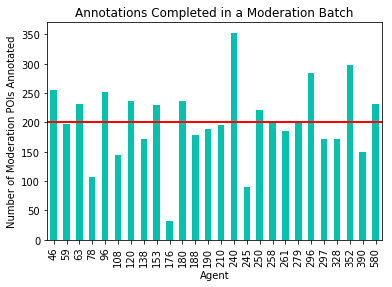

In [45]:
df['LastName'] = df['Unnamed: 3']
df['count'] = 1
countdf = df.groupby(['user_id', 'LastName']).sum()['count'].sort_values().to_frame(name = 'count').reset_index()
import random

countdf['user_id'] = countdf['user_id'].apply(lambda x: x*random.randint(1,10))


countdf.groupby('user_id').sum()['count'].plot(kind='bar', color = 'xkcd:turquoise')# xlabel="X-axis label", ylabel="y-axix label")
plt.title('Annotations Completed in a Moderation Batch')
plt.xlabel('Agent')
plt.ylabel('Number of Moderation POIs Annotated')
plt.axhline(countdf['count'].mean(), color='red', linewidth=2)
plt.show()


In [68]:
### % consensus and # Tasks
df = result
df['count'] = 1
countdf = df.groupby(['user_id']).sum()['count'].sort_values().to_frame(name = 'count').reset_index()


,user_id,%,%avg,count
0,16,2.269841,0.567460,252
1,17,2.449782,0.612445,229
2,20,2.523207,0.630802,237
3,21,2.672414,0.668103,232
4,22,3.032258,0.758065,31
5,23,2.309942,0.577485,171
6,25,2.705882,0.676471,221
7,26,2.292453,0.573113,106
8,29,2.284946,0.571237,186
9,30,2.215385,0.553846,195


Text(0.5,1,'% Consensus and # Tasks')

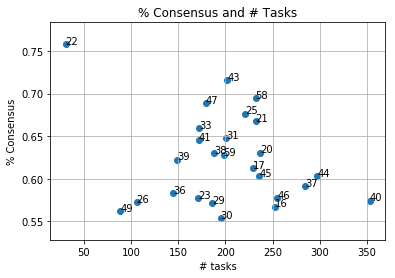

In [73]:
## get consensus df from below
rossdf = pd.merge(final, countdf, on = 'user_id')
rossdf.head()


y=rossdf['%avg']
z=rossdf['count']
n=rossdf['user_id']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
ax.grid()
ax.set_xlabel('# tasks')
ax.set_ylabel('% Consensus')
plt.title('% Consensus and # Tasks')

,user_id,count
0,22,31
1,49,89
2,26,106
3,36,145
4,39,149
5,23,171
6,41,172
7,33,172
8,47,179
9,29,186


In [33]:
columnsz = [
 'cleanadd', 
 'cleanname',
 'cleantel',
 'cleansite',
 'country',
 'locality',
 'postcode',
 'region',]
final = pd.DataFrame()
accuracydict={}
for number,country in enumerate(result.file_x.unique()):
    for i, v in enumerate(columnsz): 
        cunt = result
        lowagreement = cunt.groupby([ 'task_id',str(v)]).size().to_frame(name = 'count').reset_index()
        df4agree = (lowagreement[lowagreement['task_id'].duplicated(keep=False)])
        perc5 = ( len(df4agree[df4agree['count'] ==4].task_id.unique())/len(result.task_id.unique()))
        percent = ({str(v):perc5})
        accuracydict.update(percent)

    all_perc_disagree = pd.Series(accuracydict).to_frame().sort_values([0],ascending = True)
    all_perc_disagree.columns = [(str(country[0:2])).upper()]
    final = pd.concat([all_perc_disagree, final], axis=1)
    #print("% disagreement by column in ",str(country[0:2]) )
print("    MODERATION: % there is consensus among 5 on a POI, by field input")
display(HTML(((final).to_html())))
final.rename(index={'cleanadd': 'Address','cleanname': 'Name' , 'cleansite':'Website', 'cleantel': 'Tel'})

    MODERATION: % there is consensus among 5 on a POI, by field input


,FR,GB,AU,US,IT,CA
country,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
region,0.004798,0.004798,0.004798,0.004798,0.004798,0.004798
locality,0.024952,0.024952,0.024952,0.024952,0.024952,0.024952
postcode,0.056622,0.056622,0.056622,0.056622,0.056622,0.056622
cleanname,0.147793,0.147793,0.147793,0.147793,0.147793,0.147793
cleantel,0.148752,0.148752,0.148752,0.148752,0.148752,0.148752
cleansite,0.149712,0.149712,0.149712,0.149712,0.149712,0.149712
cleanadd,0.214971,0.214971,0.214971,0.214971,0.214971,0.214971


,FR,GB,AU,US,IT,CA
country,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
region,0.004798,0.004798,0.004798,0.004798,0.004798,0.004798
locality,0.024952,0.024952,0.024952,0.024952,0.024952,0.024952
postcode,0.056622,0.056622,0.056622,0.056622,0.056622,0.056622
Name,0.147793,0.147793,0.147793,0.147793,0.147793,0.147793
Tel,0.148752,0.148752,0.148752,0.148752,0.148752,0.148752
Website,0.149712,0.149712,0.149712,0.149712,0.149712,0.149712
cleanadd,0.214971,0.214971,0.214971,0.214971,0.214971,0.214971


In [36]:
final = final[['CA']]
final.rename(index={'cleanadd': 'Address','cleanname': 'Name' , 'cleansite':'Website', 'cleantel': 'Tel'})

,CA
country,0.000000
region,0.004798
locality,0.024952
postcode,0.056622
Name,0.147793
Tel,0.148752
Website,0.149712
Address,0.214971


In [42]:
100- 74#-21

26

In [24]:
howmany = result.groupby([ 'task_id']).size().to_frame(name = 'count').reset_index()


,task_id,count
116,59149,7
131,59164,6
186,59219,6
214,59247,6
257,59290,6
276,59309,6
334,59367,6
413,59446,6
425,59458,6
433,59466,6


consensus


,user_id,%,%avg
4,22,3.032258,0.758065
18,43,2.861386,0.715347
24,58,2.780172,0.695043
22,47,2.754190,0.688547
6,25,2.705882,0.676471
3,21,2.672414,0.668103
11,33,2.639535,0.659884
10,31,2.592040,0.648010
17,41,2.581395,0.645349
2,20,2.523207,0.630802


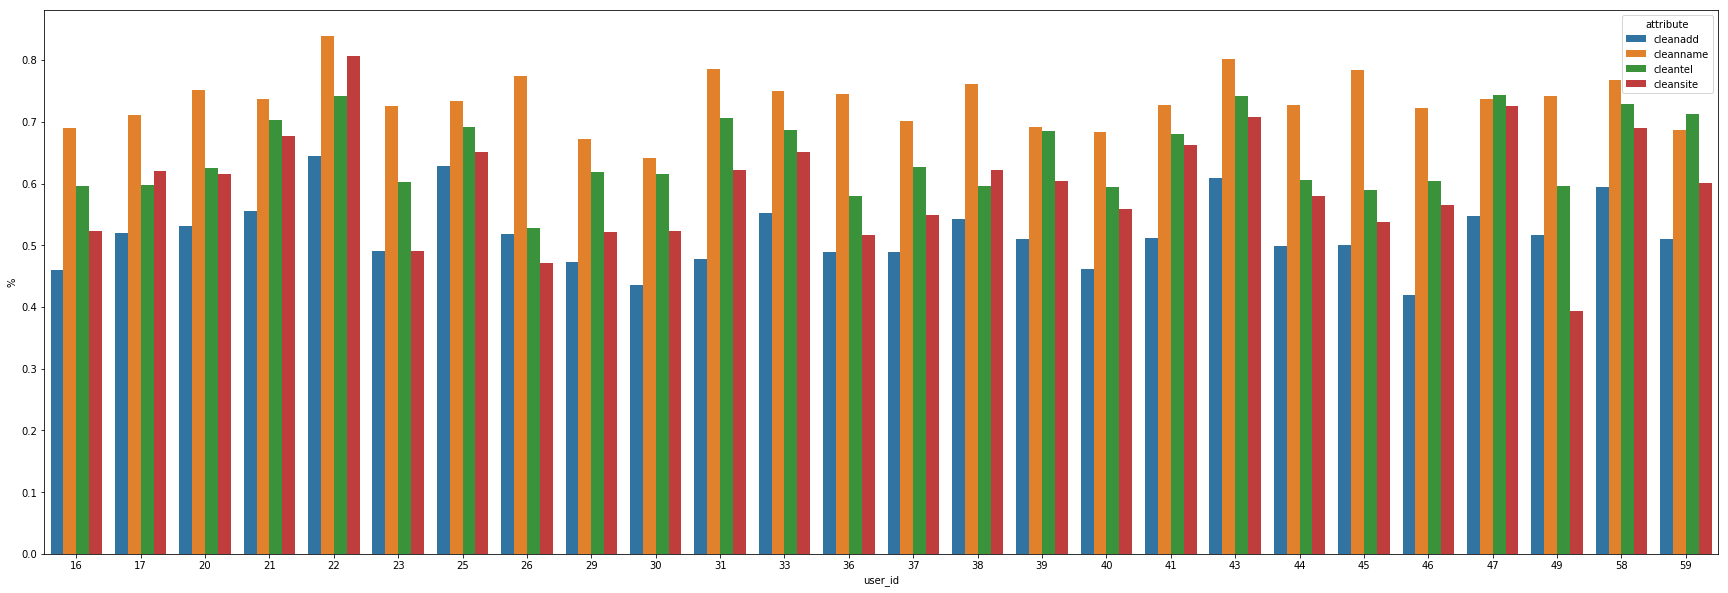

In [67]:
from collections import Counter
def counted_df(agree5tasks):
    #count number of times consensus
    cnt = Counter()
    for word in list(agree5tasks.user_id):
         cnt[word] += 1
    d={}
    for key, value in cnt.items():
        d[key] = value
    #count number of times total
    cnt = Counter()
    for word in list(result.user_id):
         cnt[word] += 1
    t={}
    for key, value in cnt.items():
        t[key] = value
    ## merge the two
    d = pd.DataFrame.from_dict(d, orient='index').reset_index()
    t = pd.DataFrame.from_dict(t, orient='index').reset_index()
    final = pd.merge(d,t , on = 'index')
    final['%'] = final['0_x']/final['0_y']
    final.sort_values(['%'], ascending = False)
    final = final.rename(columns={"index": "user_id"})
    final["user_id"] = final["user_id"].apply(lambda x: int(x))
    return final

columnsz = [
 'cleanadd',
 'cleanname',
 'cleantel',
 'cleansite']
finalDF = pd.DataFrame()
for i,v in enumerate(columnsz):
    datafr = result   
    datafr = datafr.groupby('task_id').size().to_frame().reset_index()
    datafr = (datafr[datafr[0]==5])
    datafr = pd.merge(datafr,result, on ='task_id',  how = 'left')


    lowagreement = datafr.groupby([ 'task_id', str(v)]).size().to_frame(name = 'count').reset_index()
    agree5 = lowagreement[lowagreement['count'] >4]
    agree5tasks = pd.merge(agree5,result, on ='task_id',  how = 'left')
    final2 = counted_df(agree5tasks)
    final2['attribute'] = str(v)
    final2 = final2.sort_values(['%'])
    final2 = final2[['user_id', '%', 'attribute']]
    final2['rank'] = final2['%'].rank(method='dense', ascending=False)
    finalDF = pd.concat([finalDF, final2], axis = 0)
finalDF
import seaborn as sns

plt.subplots(figsize=(30,10))

print('consensus')
ax = sns.barplot(x='user_id', y='%', hue='attribute', data=finalDF , )

g = (finalDF.groupby('user_id').sum()['rank']).reset_index()
g['Rank'] = g['rank'].rank(method='dense', ascending=True)
g = g.sort_values(['Rank'], ascending = True)
g[['user_id', 'Rank']][0:10]

final = finalDF.groupby('user_id').sum()['%'].reset_index()
final['%avg'] = final['%'].apply(lambda x: x/4)
final.sort_values(['%avg'], ascending =False)



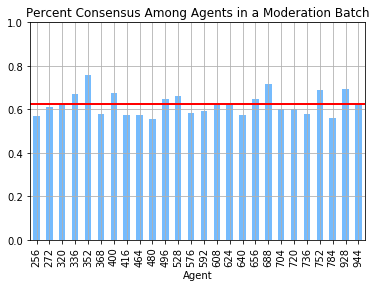

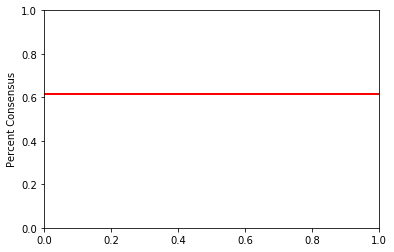

In [59]:
final['user_id'] = final['user_id'].apply(lambda x: x*1)
final.groupby('user_id').sum()['%avg'].plot(kind='bar', color = 'xkcd:sky blue')# xlabel="X-axis label", ylabel="y-axix label")
plt.axhline(final['%avg'].mean(), color='red', linewidth=2)
plt.yticks(np.arange(0, 1.20, step=0.2))
plt.title('Percent Consensus Among Agents in a Moderation Batch')
plt.xlabel('Agent')
plt.grid()
plt.figure(facecolor='white')
plt.axhline(final['%avg'].median(), color='red', linewidth=2)
plt.ylabel('Percent Consensus')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import json
import codecs
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

taskusdf = pd.read_csv('/Users/kimia/Downloads/Karen.txt', sep=',')[3:]
#['Id', 'Email', 'First'  ,'Last' ,'Created' ,'Updated', 'Hire Date']
taskusdf = taskusdf[['Unnamed: 0', 'Unnamed: 3','Unnamed: 6' ]]

taskusdf['hire'] = pd.to_datetime(taskusdf['Unnamed: 6'],  errors = 'coerce')

taskusdf['today'] = pd.to_datetime('today')
taskusdf['totaltime'] = taskusdf['today'] -taskusdf['hire']
taskusdf["user_id"] = taskusdf["Unnamed: 0"]
taskusdf["user_id"] = taskusdf["user_id"].apply(lambda x: int(x))
taskusdf['timeclean'] = taskusdf['totaltime'].apply(lambda x: int(str(x)[0:3]))

df = result 
df = pd.merge(df, taskusdf, on='user_id', how = 'left')


In [ ]:
df['LastName'] = df['Unnamed: 3']
df['count'] = 1
countdf = df.groupby(['user_id', 'LastName']).sum()['count'].sort_values().to_frame(name = 'count').reset_index()
del countdf['user_id']



countdf.groupby('LastName').sum()['count'].plot(kind='bar', color = 'xkcd:turquoise')# xlabel="X-axis label", ylabel="y-axix label")
plt.title('Annotations Completed in a Moderations Batch')
plt.xlabel('Name')
plt.ylabel('Number of Moderation POIs Annotated')
plt.axhline(countdf['count'].mean(), color='red', linewidth=2)
plt.show()

"""plt.figure(figsize=(10,5))
plt.hist(samps_normprop_pos_thinned,bins=100, alpha=0.4, label=u'MCMC distribution (Normal Proposal)', normed=True) 
plt.plot(xxx, f_1(xxx), 'r', label='actual f(x)')
plt.legend()"""

In [ ]:
result['cleanAddress'] =result['cleanadd']


dfresult = result
def consensus(df, column):
    lowagreement = df.groupby([ 'task_id', str(column)]).size().to_frame(name = 'count').reset_index()
    agree5 = lowagreement[lowagreement['count'] >4]
    perc5 = (len(agree5.task_id.unique())/len(lowagreement.task_id.unique()))
    accuracy = ({str(column):perc5})
    return accuracy  

columnsz = [
 'cleanAddress', 
 'cleanname',
 'cleantel',
 'cleansite',
 'country',
 'locality',
 'postcode',
 'region',]

final = pd.DataFrame()
accuracydict={}
for number,country in enumerate(result.file_x.unique()):
    
    for i, v in enumerate(columnsz): 


        percent = (consensus(dfresult[dfresult.file_x ==str(country)], str(v)))
        accuracydict.update(percent)

    all_perc_disagree = pd.Series(accuracydict).to_frame().sort_values([0],ascending = True)
    all_perc_disagree.columns = [(str(country[0:2])).upper()]
    final = pd.concat([all_perc_disagree, final], axis=1)
    #print("% disagreement by column in ",str(country[0:2]) )
print("    MODERATION: % there is consensus among 5 on a POI, by field input")
display(HTML(((final).to_html())))
final.rename(index={'cleanAddress': 'Address','cleanname': 'Name' , 'cleansite':'Website', 'cleantel': 'Tel'})

In [ ]:
#% convergence on 

datafr = result.groupby(['task_id', 'cleantel','cleansite', 'cleanadd', 'cleanname']).size().to_frame().reset_index()
#datafr[datafr[0]>4] # 2242246 rows2678
datafr[datafr[0] == 4] # 2246 rows2678
#datafr = (datafr[datafr[0]==5])

## 59149 should not be in the df

In [ ]:
from collections import Counter
def counted_df(agree5tasks):
    #count number of times consensus
    cnt = Counter()
    for word in list(agree5tasks.user_id):
         cnt[word] += 1
    d={}
    for key, value in cnt.items():
        d[key] = value
    #count number of times total
    cnt = Counter()
    for word in list(result.user_id):
         cnt[word] += 1
    t={}
    for key, value in cnt.items():
        t[key] = value
    ## merge the two
    d = pd.DataFrame.from_dict(d, orient='index').reset_index()
    t = pd.DataFrame.from_dict(t, orient='index').reset_index()
    final = pd.merge(d,t , on = 'index')
    final['%'] = final['0_x']/final['0_y']
    final.sort_values(['%'], ascending = False)
    final = final.rename(columns={"index": "user_id"})
    final["user_id"] = final["user_id"].apply(lambda x: int(x))
    return final

columnsz = [
 'cleanadd',
 'cleanname',
 'cleantel',
 'cleansite']
finalDF = pd.DataFrame()
for i,v in enumerate(columnsz):
    datafr = result   
    datafr = datafr.groupby('task_id').size().to_frame().reset_index()
    datafr = (datafr[datafr[0]==5])
    datafr = pd.merge(datafr,result, on ='task_id',  how = 'left')


    lowagreement = datafr.groupby([ 'task_id', str(v)]).size().to_frame(name = 'count').reset_index()
    agree5 = lowagreement[lowagreement['count'] >4]
    agree5tasks = pd.merge(agree5,result, on ='task_id',  how = 'left')
    final2 = counted_df(agree5tasks)
    final2['attribute'] = str(v)
    final2 = final2.sort_values(['%'])
    final2 = final2[['user_id', '%', 'attribute']]
    final2['rank'] = final2['%'].rank(method='dense', ascending=False)
    finalDF = pd.concat([finalDF, final2], axis = 0)
finalDF
import seaborn as sns

plt.subplots(figsize=(30,10))

print('consensus')
ax = sns.barplot(x='user_id', y='%', hue='attribute', data=finalDF , )

g = (finalDF.groupby('user_id').sum()['rank']).reset_index()
g['Rank'] = g['rank'].rank(method='dense', ascending=True)
g = g.sort_values(['Rank'], ascending = True)
g[['user_id', 'Rank']][0:10]

In [ ]:
final = finalDF.groupby('user_id').sum()['%'].reset_index()
final['%avg'] = final['%'].apply(lambda x: x/4)
final.sort_values(['%avg'], ascending =False)


final.groupby('user_id').sum()['%avg'].plot(kind='bar', color = 'xkcd:sky blue')# xlabel="X-axis label", ylabel="y-axix label")
plt.title('Percent Consensus Among Annotators in a Moderation Batch')
plt.xlabel('Annotator')
plt.grid()
plt.yticks(np.arange(0, 1.20, step=0.2))
plt.axhline(final['%avg'].median(), color='red', linewidth=2)
plt.ylabel('Percent Consensus')
#plt.axhline(countdf['count'].mean(), color='red', linewidth=2)
plt.show()

In [ ]:
taskusdf = pd.read_csv('/Users/kimia/Downloads/Karen.txt', sep=',')[3:]
#['Id', 'Email', 'First'  ,'Last' ,'Created' ,'Updated', 'Hire Date']
taskusdf = taskusdf[['Unnamed: 0', 'Unnamed: 3','Unnamed: 6' ]]

taskusdf['hire'] = pd.to_datetime(taskusdf['Unnamed: 6'],  errors = 'coerce')

taskusdf['today'] = pd.to_datetime('today')
taskusdf['totaltime'] = taskusdf['today'] -taskusdf['hire']
taskusdf["user_id"] = taskusdf["Unnamed: 0"]
taskusdf["user_id"] = taskusdf["user_id"].apply(lambda x: int(x))
taskusdf['timeclean'] = taskusdf['totaltime'].apply(lambda x: int(str(x)[0:3]))

final2 = pd.merge(final, taskusdf, on='user_id')

y=final2['%avg']
z=final2['timeclean']
n=final2['user_id']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
ax.set_xlabel('Days since start date')
ax.grid()
ax.set_ylabel('% Consensus')
plt.title('Taskus Rate of Consensus on Moderation')

In [ ]:




for i,v in enumerate(['tel','cleansite', 'cleanadd', 'cleanname']):
    datafr =result   
    datafr = datafr.groupby('task_id').size().to_frame().reset_index()
    datafr = (datafr[datafr[0]==5])
    datafr = pd.merge(datafr,result, on ='task_id',  how = 'left')
    jk = datafr.groupby([ 'task_id', str(v)]).size().to_frame(name = 'count').reset_index()
    jk = jk[jk['count']==4]
    con4df = result[result['task_id'].isin(list(jk.task_id.unique()))]
    con4df = con4df.groupby([ 'task_id', str(v)]).size().to_frame(name = 'count').reset_index()
    singleout = con4df[con4df['count']==1]
    singleout = pd.merge(singleout,result, on =['task_id', (str(v))],  how = 'left')


    cnt = Counter()
    for word in list(singleout.user_id):
         cnt[word] += 1

    df = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
    df['user_id'] = df.index
    df['alone'] = df[0]
    df['user_id'] = df['index']

    ## calculate the total responses
    datafr =result   
    datafr = datafr.groupby('task_id').size().to_frame().reset_index()
    datafr = (datafr[datafr[0]==5])
    datafr = pd.merge(datafr,result, on ='task_id',  how = 'left')
    datafr['1'] = 1
    total = datafr.groupby('user_id').sum()['1'].to_frame().reset_index()
    total = datafr.groupby('user_id').sum()['1'].to_frame().reset_index()

    df = pd.merge(total, df, on = 'user_id')
    df = pd.merge(taskusdf, df, on = 'user_id')
    df['avgalone'] = df['alone']/df['1']


In [ ]:
timedf = df
y=timedf['avgalone']
z=timedf['timeclean']
n=timedf['user_id']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
ax.set_xlabel('Days since start date')
ax.set_ylabel('Percent Divergence')
ax.grid()
plt.title('Taskus Rate of Divergence on Moderation')

In [ ]:


df.groupby('user_id').sum()['avgalone'].plot(kind='bar', color = 'xkcd:sky blue')# xlabel="X-axis label", ylabel="y-axix label")
plt.title('Percent Divergence Among Annotators in a Moderation Batch')
plt.xlabel('Annotator')
plt.grid()
plt.yticks(np.arange(0, .15, step=0.03))
plt.axhline(df['avgalone'].median(), color='red', linewidth=2)
plt.ylabel('Percent Divergent')
#plt.axhline(countdf['count'].mean(), color='red', linewidth=2)
plt.show()